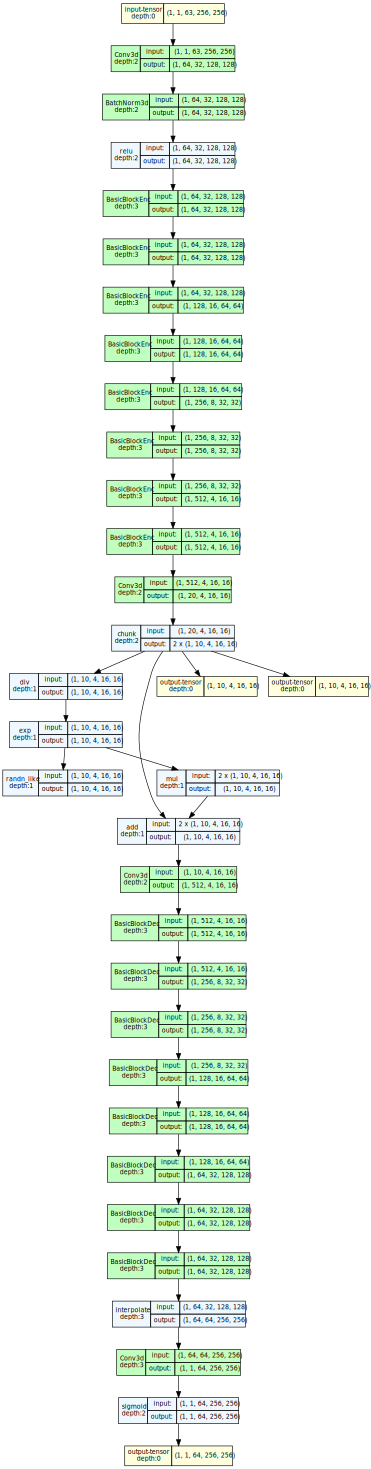

In [8]:
import os

from embed_time.model_VAE_resnet18_3D import VAEResNet18_3D
import torch
from torch.utils.data import DataLoader
from torch.nn import functional as F
from torch.nn import utils as U
from torch import optim
from torchvision.transforms import v2
import matplotlib.pyplot as plt
import subprocess
import pandas as pd
import numpy as np
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime
import yaml
from datasets.neuromast import NeuromastDatasetTrain
from torchview import draw_graph

beta = 1e-4
lr = 1e-3
z_dim = 22
model_name = "neuromast_resnet18_vae_conv2D"
run_name= "z_dim-"+str(z_dim)+"_lr-"+str(lr)+"_beta-"+str(beta)
metadata = pd.read_csv("/mnt/efs/dlmbl/G-et/data/neuromast/Dataset/metadata_neuromast_balanced_train.csv")

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

#launch tensorboard



#%% Generate Dataset
Train_dataset = NeuromastDatasetTrain()

#dataloader
train_loader = DataLoader(Train_dataset, batch_size=1, shuffle=True, num_workers=8)

# Initiate VAE-ResNet18 model
vae = VAEResNet18_3D(nc = 1, z_dim = z_dim ).to(device)

#%% Define Optimizar
optimizer = torch.optim.AdamW(vae.parameters(), lr=lr)

#%% Define loss function
def loss_function(recon_x, x, mu, logvar):
    MSE = F.mse_loss(recon_x, x, reduction='mean')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return MSE, KLD   
import torch
from torchviz import make_dot
import torch.nn.functional as F

# Assuming your VAEResNet18_3D model is defined as `VAEResNet18_3D`
# Initialize the model
model = VAEResNet18_3D(nc=1, z_dim=10)

#import torch
from torchviz import make_dot
import torch.nn.functional as F

# Assuming your VAEResNet18_3D model is defined as `VAEResNet18_3D`
# Initialize the model
model = VAEResNet18_3D(nc=1, z_dim=10)

dataset = NeuromastDatasetTrain()
# Create a sample input tensor with shape (1, 1, 64, 256, 256)
input_tensor,label = dataset[110] # Adjust nc=1 for single channel input
input_tensor = torch.from_numpy(input_tensor)
input_tensor = input_tensor.unsqueeze(0)

# Pass the sample input through the model
output, mu, logvar = model(input_tensor)

graph = draw_graph(model, input_tensor)
graph.visual_graph